<a href="https://colab.research.google.com/github/sakshigodse05/Deep-Learning/blob/main/customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.duplicated().sum()

0

In [8]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
x=df.drop(columns=['Exited'])
y=df['Exited'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape


(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_trf=sc.fit_transform(x_train)
x_test_trf=sc.transform(x_test)

In [18]:
x_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(5,activation='relu',input_dim=11))   #input layer
#model.add(Dense(11,activation='relu'))
model.add(Dense(2,activation='sigmoid'))               #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72 (288.00 B)

 Trainable params: 72 (288.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
history=model.fit(x_train_trf,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5609 - loss: 0.8306 - val_accuracy: 0.7200 - val_loss: 0.5820
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5676 - val_accuracy: 0.7925 - val_loss: 0.4941
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4853 - val_accuracy: 0.8106 - val_loss: 0.4613
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4470 - val_accuracy: 0.8163 - val_loss: 0.4461
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4422 - val_accuracy: 0.8175 - val_loss: 0.4386
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8127 - loss: 0.4386 - val_accuracy: 0.8169 - val_loss: 0.4335
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8162 - loss: 0.4265 - val_accuracy: 0.8163 - val_loss: 0.4293
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8195 - loss: 0.4227 - val_accuracy: 0.

In [42]:
model.layers[0].get_weights()          #33 layers 3 biases

[array([[-0.06414981, -0.04546943,  0.22435668, -0.04513017, -0.1931158 ],
        [ 0.65534645,  0.2525396 , -0.6842245 ,  0.16492149, -0.92746973],
        [ 0.312011  ,  0.04016393,  0.15736125,  0.04649161, -0.07665425],
        [-0.24750915,  0.28765374, -0.06286428, -0.29340523, -0.01974998],
        [-0.07278353,  0.8205478 , -0.12559596, -1.273504  , -0.15500619],
        [ 0.20435429, -0.04698499, -0.30593014, -0.0344261 ,  0.19605595],
        [ 0.71649927, -0.34137937,  0.06710935, -0.42264205, -0.48202315],
        [-0.03292055,  0.1197798 , -0.02346093,  0.04777411,  0.13763055],
        [-0.08218658, -0.1635485 , -0.56910384,  0.08813387,  0.01658802],
        [ 0.29423472,  0.05356061, -0.4906058 , -0.03651122,  0.20891066],
        [ 0.04844024, -0.07644591,  0.53099936, -0.0356009 , -0.18273994]],
       dtype=float32),
 array([-0.31482753, -0.29178825,  0.8507896 ,  0.21630153,  0.9181361 ],
       dtype=float32)]

In [48]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [55]:
y_pred=np.where(y_log>0.5,1,0)

In [56]:
y_pred

array([[1, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 0]])

In [60]:

y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to labels
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


Accuracy: 0.8195


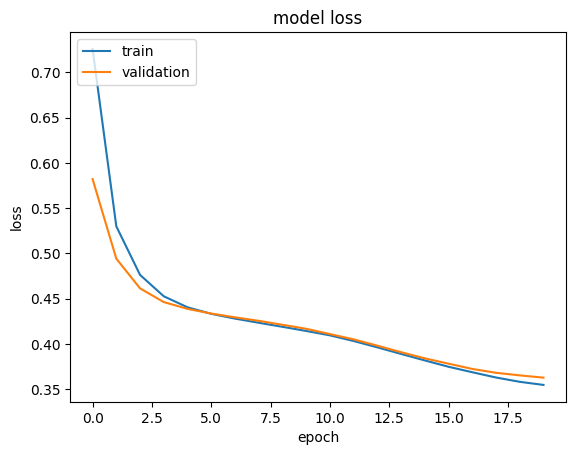

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


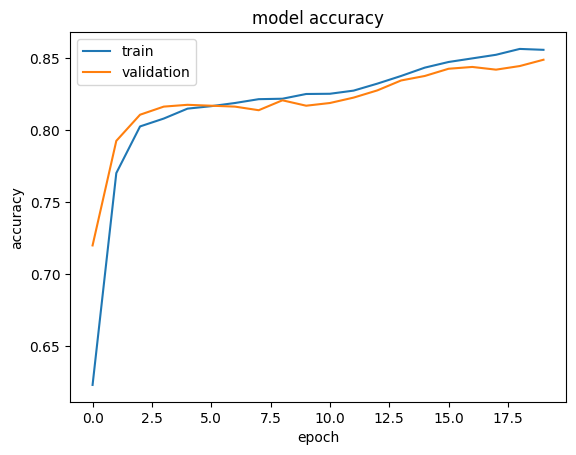

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#